In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(13)

In [2]:
areaLim = 20
n = 10
new = 4
positionsFixed = np.random.uniform(-20, 20,(n,2)) 
positionsFree = np.random.uniform(-20, 20,(new,2))

originalPositionsFree = positionsFree.copy()

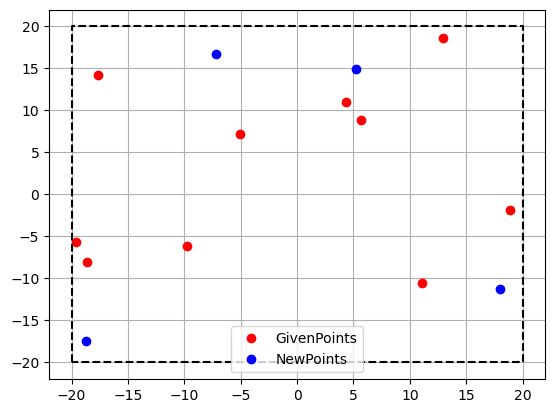

In [3]:
def visualization(positionsGivenNodes, positionsOptNodes):
    plt.plot(positionsGivenNodes[:,0],positionsGivenNodes[:,1], 'or', label='GivenPoints', linestyle = 'None')
    plt.plot(positionsOptNodes[:,0],positionsOptNodes[:,1], 'ob',   label='NewPoints', linestyle = 'None')
    plt.xlim([-areaLim-2, areaLim+2])
    plt.ylim([-areaLim-2, areaLim+2])
    plt.plot([-areaLim, -areaLim, areaLim, areaLim, -areaLim], [-areaLim, areaLim, areaLim, -areaLim, -areaLim],'--k') 
    plt.grid()
    plt.legend()
    plt.show()

visualization(positionsFixed, positionsFree)

In [4]:
def distanceBetweenTwoPoints(point1, point2):
    return np.linalg.norm(point1-point2)

In [5]:
def averageDistanceBetweenAllPoints(positionsGivenNodes, positionsOptNodes):
    fullDistance, totalEdges = 0, 0
    # between 
    for i in range(0, len(positionsGivenNodes)):
        for j in range(0, len(positionsOptNodes)):
            fullDistance += distanceBetweenTwoPoints(positionsGivenNodes[i], positionsOptNodes[j])
            totalEdges += 1

    for i in range(0, len(positionsOptNodes)):
        for j in range(i+1, len(positionsOptNodes)):
            fullDistance += distanceBetweenTwoPoints(positionsOptNodes[i], positionsOptNodes[j])
            totalEdges += 1
    return fullDistance / totalEdges

In [6]:
def importanceOfPoint(point):
    # toDo substitute with the importance factor of each cell
    #    this testing version gives more importance to points 
    #    close to a distance of areaLim
    im = np.linalg.norm(point)
    if im > areaLim:
        return -1
    else:
        return im
    #return 2/(np.linalg.norm(point)+1)

In [7]:
def objectiveFunctDistanceImportance(positionsFixed, positionsFree, factor=16000):
    distanceVal = 0
    importanceVal = 0
    avgDist = averageDistanceBetweenAllPoints(positionsFixed, positionsFree)
    
    # distance value
    for i in range(0, len(positionsFixed)):
        for j in range(0, len(positionsFree)):
            edgeDistance = distanceBetweenTwoPoints(positionsFixed[i], positionsFree[j])
            distanceVal += (avgDist - edgeDistance)**2

    for i in range(0, len(positionsFixed)): # ToDo len(positionsFixed) or len(positionsFree)??
        for j in range(i+1, len(positionsFree)):
            edgeDistance =  distanceBetweenTwoPoints(positionsFree[i], positionsFree[j])
            distanceVal += (avgDist - edgeDistance)**2

    # importance value
    for i in range(0, len(positionsFree)):
            importanceVal += importanceOfPoint(positionsFree[i])

    return distanceVal + factor*1/(importanceVal + 1)

In [8]:
def quasiGradient(positionsGiven, positionsNew, objectiveFunction, h=0.00001):
    f0 = objectiveFunction(positionsGiven, positionsNew)
    df = positionsNew * 0;
    for i in range(0, len(positionsNew)):
        for j in range (0, 2): # x and y coordinates
            positionsFreeNew = positionsFree; 
            positionsFreeNew[i][j] += h
            f1 = objectiveFunction(positionsFixed, positionsFreeNew)
            df[i][j] = (f1-f0)/h;
    return df

In [9]:
def quasiGradientDescent(positionsFixed, positionsFree, objectiveFunction, step=0.1, eps=1e-6, maxIter=1000):
    iter = 0
    objValOld = objectiveFunction(positionsFixed, positionsFree)
    print("initial: ", objValOld)
    grad = quasiGradient(positionsFixed, positionsFree, objectiveFunction)
    while np.linalg.norm(grad) > eps and iter < maxIter and step > eps:
        grad = grad/np.linalg.norm(grad)
        positionsFree -= step * grad
        objValNew = objectiveFunction(positionsFixed, positionsFree) 
        if objValOld < objValNew:
            positionsFree += step * grad
            step = step * 0.9
        else:
            objValOld = objValNew
        grad = quasiGradient(positionsFixed, positionsFree, objectiveFunction)
        iter += 1
    print("iterations: ", iter,"/",maxIter)
    print("after optimization: ", objValNew)


In [10]:
quasiGradientDescent(positionsFixed, positionsFree, objectiveFunctDistanceImportance, maxIter=1000)

initial:  6429.943920462221
iterations:  701 / 1000
after optimization:  2387.366066506756


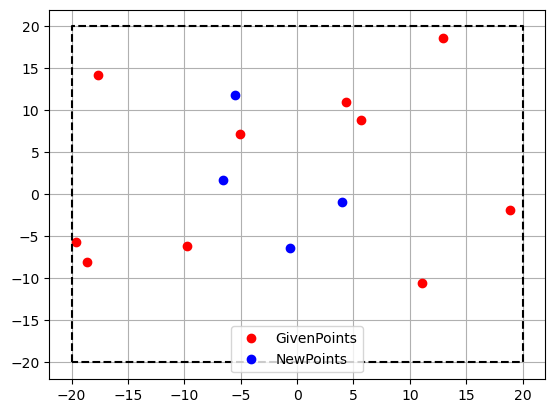

In [11]:
visualization(positionsFixed, positionsFree)

In [12]:
print("Optimized positions:")
for p in positionsFree:
    print(p)

Optimized positions:
[-0.67211037 -6.36000954]
[-5.49913946 11.8458533 ]
[-6.53019326  1.76982989]
[ 3.95548293 -0.94691652]


In [13]:
print("Original positions:")
for p in originalPositionsFree:
    print(p)

Original positions:
[ 17.96376727 -11.28403963]
[-7.22434534 16.71089544]
[-18.72385334 -17.39661852]
[ 5.19315996 14.95253773]
